In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/datasets"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)) )

number_of_images.items()

dict_items([('no', 1500), ('yes', 1500)])

In [ ]:
def dataFolder(p, split):
    if not os.path.exists("./" + p):
        os.mkdir("./" + p)

        for dir in os.listdir(ROOT_DIR):
            os.makedirs("./" + p + "/" + dir, exist_ok=True)
            images_dir = os.path.join(ROOT_DIR, dir)
            images_list = os.listdir(images_dir)
            num_images = len(images_list)
            num_images_to_copy = math.floor(split * num_images) - 5

            selected_images = np.random.choice(images_list, size=num_images_to_copy, replace=False)

            for img in selected_images:
                src_path = os.path.join(images_dir, img)
                dest_path = os.path.join("./" + p, dir)
                shutil.copy(src_path, dest_path)
                # os.remove(src_path)
    else:
        print(f"{p} Folder exists")

In [ ]:
dataFolder("train",0.8)

In [ ]:
# dataFolder("val",0.15)

In [ ]:
dataFolder("test",0.2)

In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization,GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras

In [ ]:
#CNN Model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))


model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation='sigmoid'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 128)       7

In [ ]:
model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
#Preparing our data using data generator
def preprocessingImages1(path):
  """
  input:Path
  output:Pre processed images
  """
  image_data=ImageDataGenerator(zoom_range=0.2,shear_range=0.2,rescale=1/255,horizontal_flip=True)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [ ]:
path = "/content/train"
train_data = preprocessingImages1(path)

Found 2390 images belonging to 2 classes.


In [ ]:
# model.compile(optimizer='adam',loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
#Preparing our data using data generator
def preprocessingImages2(path):
  """
  input:Path
  output:Pre processed images
  """
  image_data=ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory=path,target_size=(224,224),batch_size=32,class_mode='binary')

  return image

In [ ]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 590 images belonging to 2 classes.


In [ ]:
# path = "/content/val"
# val_data = preprocessingImages2(path)

In [ ]:
#early stopping and model checkpoints
from keras.callbacks import ModelCheckpoint,EarlyStopping
#early stoppings
es = EarlyStopping(monitor="loss",min_delta=0.01,patience=5,verbose=1,mode='auto')

#model checkpoint
mc = ModelCheckpoint(monitor="loss",filepath="./bestmodel.h5",verbose=1,save_best_only=True,mode='auto')

cd=[es,mc]

Model Training

In [ ]:
history = model.fit(
    train_data,
    steps_per_epoch=24,
    epochs=30,
    verbose=1,
    validation_data=test_data,
    validation_steps=16,
    callbacks=cd
)


Epoch 1/30
24/24 [==============================] - ETA: 0s - loss: 0.3700 - accuracy: 0.8555
Epoch 1: loss improved from 0.39060 to 0.36996, saving model to ./bestmodel.h5
24/24 [==============================] - 182s 8s/step - loss: 0.3700 - accuracy: 0.8555 - val_loss: 0.3605 - val_accuracy: 0.8535
Epoch 2/30
24/24 [==============================] - ETA: 0s - loss: 0.4173 - accuracy: 0.8298
Epoch 2: loss did not improve from 0.36996
24/24 [==============================] - 174s 7s/step - loss: 0.4173 - accuracy: 0.8298 - val_loss: 0.3462 - val_accuracy: 0.8535
Epoch 3/30
24/24 [==============================] - ETA: 0s - loss: 0.3837 - accuracy: 0.8464
Epoch 3: loss did not improve from 0.36996
24/24 [==============================] - 174s 7s/step - loss: 0.3837 - accuracy: 0.8464 - val_loss: 0.3746 - val_accuracy: 0.8555
Epoch 4/30
24/24 [==============================] - ETA: 0s - loss: 0.3524 - accuracy: 0.8620
Epoch 4: loss improved from 0.36996 to 0.35244, saving model to ./bes

In [ ]:
model.evaluate(test_data)

19/19 [==============================] - 27s 1s/step - loss: 0.1240 - accuracy: 0.9525


[0.12400861829519272, 0.9525423645973206]

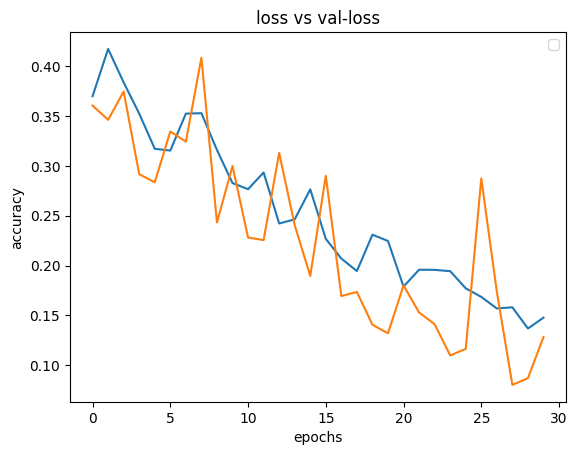

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title("loss vs val-loss")
plt.legend()
plt.show()

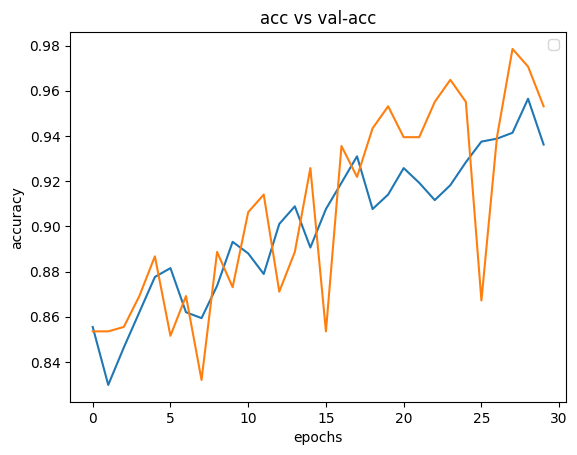

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.title("acc vs val-acc")
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
test_image = tf.keras.utils.load_img('mri-brain_web.jpg', target_size=(224,224))
test_img = np.array(test_image)

result = model.predict(test_img[np.newaxis, ...])

if result == 0:
  print('There is no tumor detected')
else:
  print('There is a tumor detected')

1/1 [==============================] - 0s 58ms/step
There is no tumor detected
